In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
delta_t = 1e-6
rpm = 500 # Drehzahl in rpm
omega = np.pi * 2.0 * rpm / 60 # Winkelgeschwindigkeit in rad/s
phi0 = 0.0
phi_end = np.pi / 2.0
t_end = (phi_end - phi0) / omega
a = int(np.floor(t_end / delta_t))
print(a)
volume = 1e-4
#alpha = np.linspace(0, 3 * np.pi /4, a)

30000


In [3]:
radius = 0.05
def calculate_rad_velocity(rpm, radius):
    return (rpm/60) * 2 * np.pi * radius

def calculate_angle_velocity(rpm):    
    return (rpm/60) * 2 * np.pi

In [4]:
viscosity = 1e-3
height = 1.5e-4
delta_x = 8e-3
width = 0.06556
rad_velocity = calculate_rad_velocity(rpm, radius)
#angle_velocity = calculate_angle_velocity(rpm)
#t = alpha / angle_velocity
delta_t = 1e-6

In [5]:
class Fluid():
    def __init__(self,
                 kinematic_viscosity: float = 1e-6,
                 norm_density: float = 998.2,
                 norm_pressure: float = 101325,
                 initial_pressure: float = 101325,
                 factor_b: float = 3.214e8,
                 factor_m: float = 7.0,
                )-> None:
        """
        Initializes the fluid class with NIST values of fluid properties
        """
        self._kinematic_viscosity = kinematic_viscosity
        self._norm_density = norm_density
        self._norm_pressure = norm_pressure
        self._initial_pressure = initial_pressure
        self._factor_b = factor_b
        self._factor_m = factor_m
        
    @property
    def kinematic_viscosity(self):
        return self._kinematic_viscosity
    
    @property
    def norm_density(self):
        return self._norm_density
    
    @property
    def norm_pressure(self):
        return self._norm_pressure
    
    @property
    def initial_pressure(self):
        return self._initial_pressure
    
    @property
    def factor_b(self):
        return self._factor_b
    
    @property
    def factor_m(self):
        return self._factor_m
    
    def density(self, pressure: float = None, temperature: float = None)-> float:
        pressure_diff = np.asarray(pressure) - self.norm_pressure
        result = self.norm_density * (((pressure_diff / self._factor_b) + 1)**(1/self._factor_m))
        return result
    def pressure(self, density: float = None, temperature: float = None)-> float:
        result = self.norm_pressure + self.factor_b * ((np.asarray(density) / self.norm_density)**self.factor_m - 1)
        return result
        

In [6]:
def calculate_volume_flow (width, height, rad_velocity, viscosity, delta_p, delta_x):
    
    volume_flow = width * height * (rad_velocity - (2/(3*viscosity))*(height**2) * delta_p / delta_x)
    
    return volume_flow

In [7]:
def calculate_mass_flow(volume_flow, density):
    delta_m = abs(volume_flow) * density
    return delta_m

In [8]:
def calculate_new_density(delta_m, volume, delta_t, density_t0):
    density_t1 = density_t0 + delta_m * delta_t / volume
    return density_t1

In [9]:
water = Fluid()

p1 = np.empty(a)
density1 = np.empty(a)

p0 = 1e5
p1[0] = 1e5
p2 = 16e5
density0 = water.density(pressure=p0,temperature=None)
density1[0] = water.density(pressure=p1[0],temperature=None)
density2 = water.density(pressure=p2,temperature=None)

for i in range(1,a):
    #delta_t = t[i]- t[i-1]
    
    densityOld = density1[i-1]
    delta_p10 = p1[i-1] - p0
    delta_p21 = p2 - p1[i-1]
    
    volume_flow10 = calculate_volume_flow(width, height, rad_velocity, viscosity, delta_p10, delta_x)
    volume_flow21 = calculate_volume_flow(width, height, rad_velocity, viscosity, delta_p21, delta_x)
    
    mass_flow10 = calculate_mass_flow(volume_flow10,density1)
    mass_flow21 = calculate_mass_flow(volume_flow21,density2)
    
    delta_m = mass_flow21 - mass_flow10
    
    density1 = calculate_new_density(delta_m, volume, delta_t, densityOld)
    p1[i] = water.pressure(density=density1[i])

(0, 5e-05)

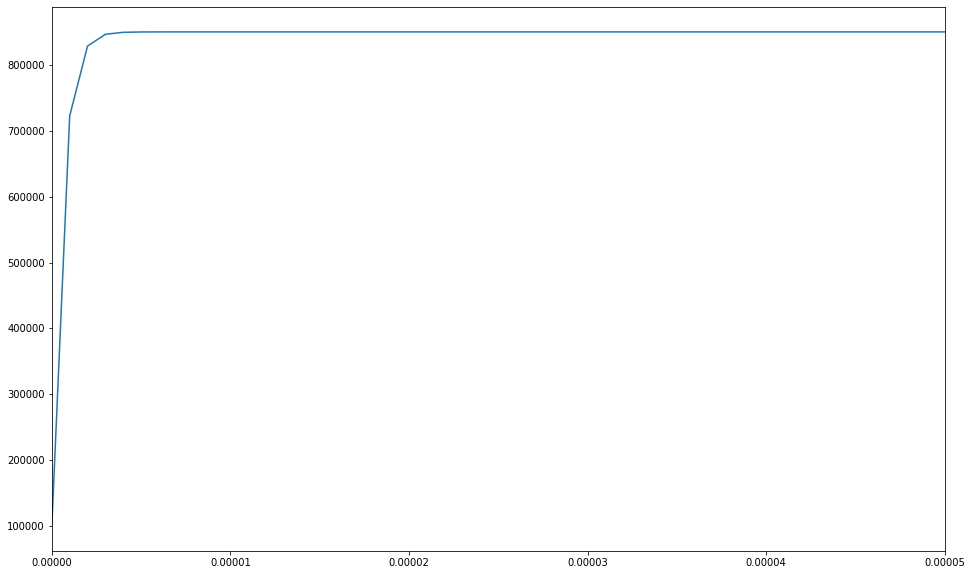

In [15]:
t = np.linspace(0,(delta_t*a), a)
plt.figure(figsize=(16,10))
plt.plot(t,p1)
plt.xlim(0, 5e-5)

In [25]:
density_1 = water.density(pressure=4.3e5)
density_2 = water.density(pressure=6.0e5)
volume_change = density_1 * volume / density_2

In [26]:
print(volume_change)

9.999245377048969e-05


In [27]:
constant_volume_flow = omega * volume * 8

In [28]:
print(constant_volume_flow)

0.041887902047863905


In [29]:
print(constant_volume_flow - volume_change)

0.04178790959409342
